# <span style="color: #16647A;">1 | Introduction</span>

<div style="background-color: #B4E3F1; color: gray; padding: 10px; border-radius: 15px; text-align: center;">
    <h3>📘 Rice Variety Classification and Quality Evaluation Using Image Analysis</h3>
</div>



<span style="color: black;">
Rice is one of the most globally significant grain crops, characterized by its genetic diversity that leads to numerous distinct varieties. Each variety differs in crucial features like texture, shape, and color. By harnessing these unique characteristics, we can classify and evaluate the quality of rice seeds with high accuracy.

This project leverages <span style="color: #16647A; font-weight: bold;">Transfer Learning</span> with the <span style="color: #16647A; font-weight: bold;">MobileNetV2</span> architecture in Keras to create a classification model for identifying five specific rice varieties: <span style="color: #16647A; font-weight: bold;">Arborio, Basmati, Ipsala, Jasmine,</span> and <span style="color: #16647A; font-weight: bold;">Karacadag</span>. Using a comprehensive dataset with <span style="color: #16647A; font-weight: bold;">75,000 images</span> (15,000 for each variety), the model aims to classify rice types based on their visual features, providing insights valuable for seed selection and quality assessment.

By applying advanced <span style="color: #16647A; font-weight: bold;">machine learning</span> and <span style="color: #16647A; font-weight: bold;">deep neural networks</span>, this system aspires not only to enhance rice production and quality evaluation but also to support the broader fields of computer vision and pattern recognition. The findings here may serve as a foundation for automated classification and quality assessment across a range of agricultural products, contributing to innovations in agriculture and food quality control.

In summary, this Rice Variety Classification project demonstrates how image analysis can contribute to efficient rice classification and quality evaluation, benefiting agricultural practices and computer vision research in the food industry.
</span>

# <span style="color: #16647A;">2 | Import Library</span>

In [3]:
!pip install split-folders
import warnings
warnings.filterwarnings('ignore')
import os    
import time
import torch 
import random 
import pathlib 
import torchvision     
import numpy as np  
import pandas as pd 
import splitfolders 
import torch.nn as nn   
import seaborn as sns   
import torch.utils.data
from tabulate import tabulate
from datetime import datetime  
from termcolor import colored  
import matplotlib.pyplot as plt  
from IPython.display import display
import torchvision.transforms as transforms
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import confusion_matrix, classification_report
import patoolib
sns.set_style('whitegrid')

  Obtaining dependency information for split-folders from https://files.pythonhosted.org/packages/b6/d5/307d63c03356bad6e141d8718d3f4116f51bd9c4b09e2614ffcee1f3c6fd/split_folders-0.5.1-py3-none-any.whl.metadata


# <span style="color: #16647A;">3 | Generate a DataFrame for Image Files and Their Labels</span>

In [19]:
# using patoolib to extract files. using the rar file inside your path.
patoolib.extract_archive("Rice_Image_Dataset.rar", outdir="Rice_Image_Dataset")

INFO patool: Extracting Rice_Image_Dataset.rar ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: running "C:\Program Files\WinRAR\rar.EXE" x -kb -or -- C:\Users\Tyrande\Sharare\Rice_Image_Dataset.rar
INFO patool: ... Rice_Image_Dataset.rar extracted to `Rice_Image_Dataset'.


'Rice_Image_Dataset'

In [50]:
# you dont need to right the path folder here. just write the folder name, BECAUSE YOU ARE INSIDE THE PATH
dir1 = 'Rice_Image_Dataset'
splitfolders.ratio(
    input=dir1, output='imgs', seed=42, ratio=(0.7, 0.15, 0.15))
# Path of splited sets
dir2 = 'imgs'
dir2 = pathlib.Path(dir2)

Copying files: 75000 files [01:28, 844.96 files/s] 


In [80]:
# define transformation
transform = transforms.Compose(
    [
        transforms.Resize((250,250)),
        transforms.ToTensor(),
        transforms.Normalize((0.5),(0.5))])

In [81]:
# Set the batch size for data loading
batch_size = 32

# Define a transformation that converts images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor
    # Add any other transformations here (e.g., normalization)
])

# Read train images as a dataset
train_ds = torchvision.datasets.ImageFolder(
    os.path.join(dir2, 'train'), transform=transform
)
# Create a Data Loader for training data
train_loader = torch.utils.data.DataLoader(
    train_ds, batch_size=batch_size, shuffle=True
)

# Print the training dataset information
print(colored('Train Folder:\n', 'cyan'))  # Header for train data
print(train_ds)  # Output the training dataset details


# Read validation images as a dataset
val_ds = torchvision.datasets.ImageFolder(
    os.path.join(dir2, 'val'), transform=transform 
)
# Create a Data Loader for validation data
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=batch_size, shuffle=True
)

# Print the validation dataset information
print(colored('Validation Folder:\n', 'cyan'))  # Header for validation data
print(val_ds)  # Output the validation dataset details

# Read test images as a dataset
test_ds = torchvision.datasets.ImageFolder(
    os.path.join(dir2, 'test'), transform=transform 
)
# Create a Data Loader for test data
test_loader = torch.utils.data.DataLoader(
    test_ds, batch_size=batch_size, shuffle=True
)

# Print the test dataset information
print(colored('Test Folder:\n', 'cyan'))  # Header for test data
print(test_ds)  # Output the test dataset details

Train Folder:

Dataset ImageFolder
    Number of datapoints: 52500
    Root location: imgs\train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Validation Folder:

Dataset ImageFolder
    Number of datapoints: 11250
    Root location: imgs\val
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Test Folder:

Dataset ImageFolder
    Number of datapoints: 11250
    Root location: imgs\test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [82]:
# Display the shape of the dataset for each set (Train, Validation, Test)
# The code iterates over the data loaders and prints the shape of the inputs (X) and labels (y)
for dataset_name, data_loader in {'Train': train_loader, "Validation": val_loader, 'Test': test_loader}.items():
    # Loop through the first batch of each data loader
    for images, labels in data_loader:
        # Print the dataset name in bold green
        print(colored(f'{dataset_name}:', 'cyan'))
        # Output the shape of the images (X) tensor
        print(f"Images shape [Batch_size, Channels, Height, Width]: {images.shape}")
        # Output the shape and data type of the labels (y) tensor
        print(f"Labels shape: {labels.shape}, Data type: {labels.dtype}\n")
        # Only show the first batch for brevity
        break

Train:
Images shape [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Labels shape: torch.Size([32]), Data type: torch.int64

Validation:
Images shape [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Labels shape: torch.Size([32]), Data type: torch.int64

Test:
Images shape [Batch_size, Channels, Height, Width]: torch.Size([32, 3, 250, 250])
Labels shape: torch.Size([32]), Data type: torch.int64



In [83]:
# Defining a dictionary to map label indices to corresponding rice variety names
rice_variety_labels = {
    0: "Arborio",
    1: "Basmati",
    2: "Ipsala",
    3: "Jasmine",
    4: "Karacadag"}

# Each key represents a unique label, and the value corresponds to the rice variety name
# This mapping will be used to interpret the predictions or label the data accordingly

In [84]:
# Extract the first batch of images and labels from the training data loader for plotting purposes
for batch_images, labels in train_loader:
    break  # We only need the first batch for visualization or further processing

# Display the labels of the first batch
print('Labels:', labels)

# Determine and print the number of unique classes in this batch
unique_classes = len(set(labels.numpy()))
print(f'Total Number of Classes in this Batch: {unique_classes}')

Labels: tensor([1, 2, 0, 3, 1, 2, 1, 1, 4, 4, 4, 1, 4, 2, 0, 1, 2, 1, 4, 3, 1, 4, 2, 1,
        3, 4, 0, 0, 0, 1, 0, 1])
Total Number of Classes in this Batch: 5


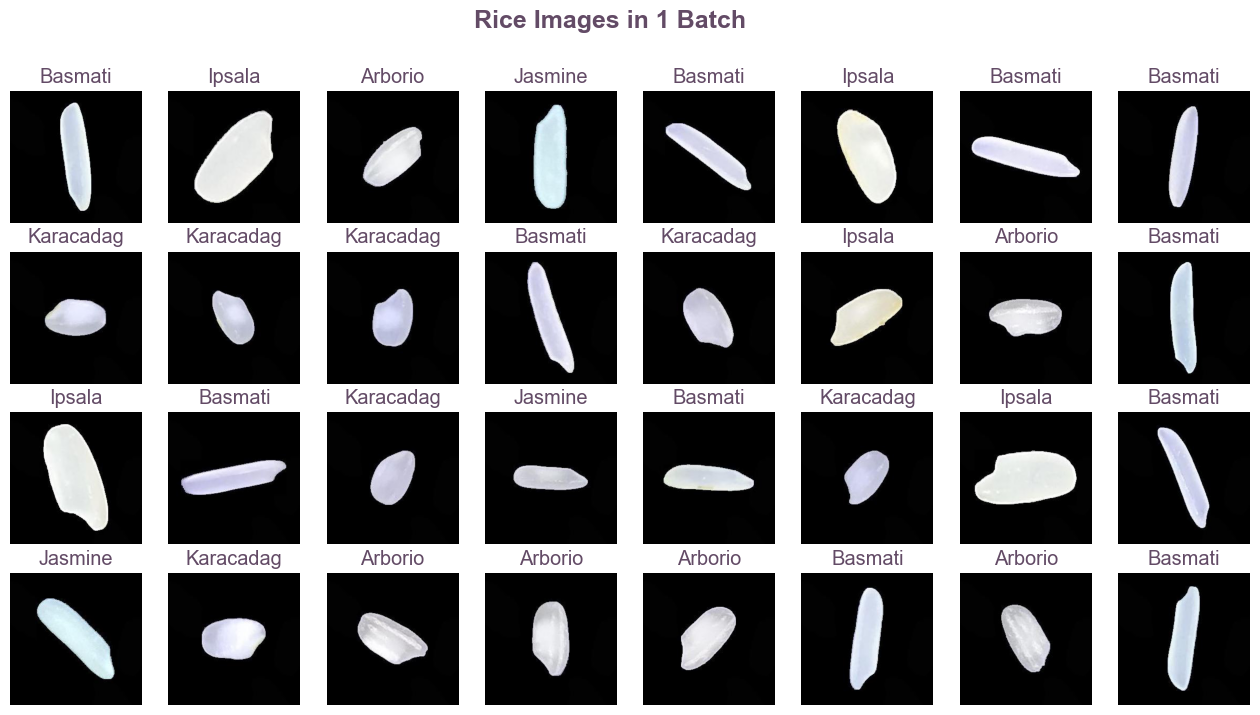

In [85]:
# Visualize 1 batch of images from the training data loader
plt.figure(figsize=(16, 8))
plt.suptitle('Rice Images in 1 Batch', fontsize=18, fontweight='bold', color='#634b66')

# Iterate through the first 32 images in the batch
for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    # Permute the image tensor to match the (Height, Width, Channels) format for plotting
    img = torch.permute(batch_images[i], (1, 2, 0))
    plt.imshow(img)
    
    # Get the label corresponding to the current image
    label = rice_variety_labels[int(labels[i])]
    
    # Set the title with the specified color and remove the axis
    plt.title(label, color='#634b66')
    plt.axis('off')
plt.show()

In [86]:
# Initialize an empty list to store image paths and their corresponding class labels
image_data = []

# Iterate through each dataset split (train, val, test)
for dataset_type in ['train', 'val', 'test']:
    dataset_dir = dir2 / dataset_type  # Construct the path to the dataset directory

    # Iterate through each class directory within the current dataset type
    for class_name in os.listdir(dataset_dir):
        class_dir = dataset_dir / class_name  # Construct the full path to the class directory
        image_files = os.listdir(class_dir)  # List all image files in the class directory

        # Loop through each image file and append its path and associated class label to the list
        for image_file in image_files:
            image_path = class_dir / image_file  # Construct the full image file path
            image_data.append((str(image_path), class_name))  # Append the path and label as a tuple to the list

# Convert the list of tuples into a pandas DataFrame for easier handling
df = pd.DataFrame(image_data, columns=['path', 'label'])

# Shuffle the DataFrame rows to randomize the order of images
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few entries of the DataFrame for verification
display(df.head())

,path,label
0,imgs\test\Jasmine\Jasmine (2624).jpg,Jasmine
1,imgs\train\Ipsala\Ipsala (13748).jpg,Ipsala
2,imgs\train\Basmati\basmati (4686).jpg,Basmati
3,imgs\train\Arborio\Arborio (6061).jpg,Arborio
4,imgs\train\Basmati\basmati (463).jpg,Basmati


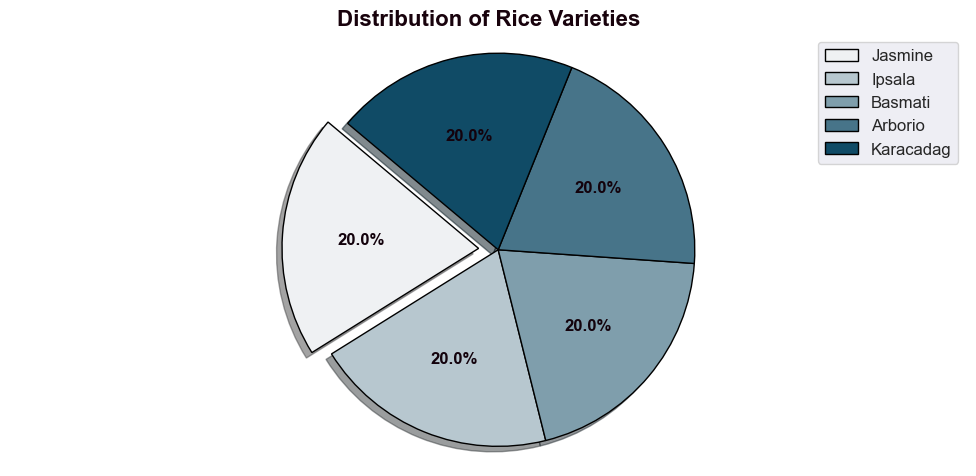

In [87]:
def label_counter(dataframe):
    """Plot a pie chart to show the distribution of rice varieties in the dataset."""
    
    # Set up the figure and axis for the plot
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Get the labels and their corresponding sizes from the dataframe
    labels = dataframe['label'].value_counts().index
    sizes = dataframe['label'].value_counts().values
    
    # Define a custom color palette with shades of green
    colors = sns.light_palette("#104b66", n_colors=len(labels), as_cmap=False)

    # Create the pie chart with a slight explosion for the first slice
    wedges, texts, autotexts = ax.pie(
        sizes, colors=colors, 
        autopct='%1.1f%%', startangle=140, 
        explode=(0.1, *([0] * (len(labels) - 1))), 
        wedgeprops=dict(edgecolor='black'), shadow=True
    )

    # Set a customized title with specific color and font settings
    ax.set_title('Distribution of Rice Varieties', fontsize=16, fontweight='bold', color='#18020c')
    ax.axis('equal')  # Ensure the pie chart is circular
    
    # Add a legend to the chart with customized font settings
    ax.legend(wedges, labels, loc="best", fontsize=12)

    # Customize text properties for the labels
    for text in texts:
        text.set_fontsize(12)
        text.set_fontweight('bold')
        text.set_color('#13020c')  # Custom color for labels

    # Customize the percentage text on the pie chart
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
        autotext.set_color('#13020c')  # Custom color for percentage text

    plt.tight_layout()
    plt.show()

# Call the function to display the rice variety distribution
label_counter(df)

# <span style="color: #16647A;">4 | Modeling</span>

In [88]:
# Define a custom Convolutional Neural Network (CNN) class
class CNN(nn.Module):
    def __init__(self, unique_classes):
        super(CNN, self).__init__()
        
        # Convolutional Layers (Feature Extractors)
        self.conv_layers = nn.Sequential(
            # First Convolutional Layer: Input channels = 3 (RGB), Output channels = 32
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            nn.ReLU(),  # Apply ReLU activation function to introduce non-linearity
            nn.MaxPool2d(kernel_size=(2, 2)),  # Reduce spatial dimensions by half
            nn.BatchNorm2d(32),  # Normalize the outputs of the previous layer
            
            # Second Convolutional Layer: Input channels = 32, Output channels = 64
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),  # Apply ReLU activation function
            nn.MaxPool2d(kernel_size=(2, 2)),  # Further reduce spatial dimensions
            nn.BatchNorm2d(64),  # Normalize the outputs of the previous layer
            
            # Third Convolutional Layer: Input channels = 64, Output channels = 128
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.ReLU(),  # Apply ReLU activation function
            nn.MaxPool2d(kernel_size=(2, 2)),  # Further reduce spatial dimensions
            nn.BatchNorm2d(128),  # Normalize the outputs of the previous layer
        )
        

        
        # Fully Connected (Dense) Layers (Classifier)
        self.dense_layers = nn.Sequential(
            nn.Linear(107648, 128),  # Fully connected layer: From flattened features to 128 units
            nn.ReLU(),  # Apply ReLU activation function
            nn.Dropout(0.5),
            nn.Linear(128, 64),  # Fully connected layer: From 128 units to 64 units
            nn.ReLU(),  # Apply ReLU activation function
            nn.Linear(64, unique_classes)  # Final layer: From 64 units to the number of classes (e.g., 5 for this model)
        )
    
    # Define the forward pass of the network
    def forward(self, X):
        out = self.conv_layers(X)  # Pass input through the convolutional layers
        out = out.view(out.size(0), -1)  # Flatten the output from the convolutional layers
        out = self.dense_layers(out)  # Pass the flattened output through the dense layers
        return out  # Return the final output (logits or class scores)

# Instantiate the model with the desired number of classes
model = CNN(unique_classes)
dgpu = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Move the model to the specified device (e.g., GPU if available)
model.to(dgpu)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (dense_layers): Sequential(
    (0): Linear(in_features=107648, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, ou

<div style="background-color: #B4E3F1; color: gray; padding: 10px; border-radius: 15px; text-align: center;">
    <h3>CNN</h3>
</div>

<span style="color: black;">
<span style="color: #16647A; font-weight: bold;">Custom Convolutional Neural Network (CNN) Definition</span> <br>
The provided code defines a custom Convolutional Neural Network (CNN) class using PyTorch. This network is designed for image classification tasks and is structured with convolutional layers for feature extraction and fully connected layers for classification.

<span style="color: #16647A; font-weight: bold;">Class Definition</span> <br>
The CNN class inherits from torch.nn.Module and sets up the network architecture.It consists of two primary components: convolutional layers and fully connected layers.

<span style="color: #16647A; font-weight: bold;">Convolutional Layers</span> <br>
The conv_layers attribute is a sequential container that includes three convolutional layers, each followed by non-linear activation, max pooling, and batch normalization:

<span style="color: #16647A; font-weight: bold;">First Convolutional Layer:</span><br>
&emsp;Takes input with 3 channels (RGB) and applies 32 filters with a kernel size of 3x3.<br>
&emsp;Uses the ReLU activation function to introduce non-linearity.<br>
&emsp;Applies max pooling with a 2x2 kernel to reduce the spatial dimensions of the feature maps.<br>
&emsp;Normalizes the output using batch normalization.<br>
    
<span style="color: #16647A; font-weight: bold;">Second Convolutional Layer:</span><br>
&emsp;&emsp;Accepts input from the previous layer with 32 channels and applies 64 filters of size 3x3.<br>
&emsp;&emsp;Again uses ReLU activation, followed by max pooling with a 2x2 kernel.<br>
&emsp;&emsp;Applies batch normalization to stabilize learning and improve convergence.<br>
    
<span style="color: #16647A; font-weight: bold;">Third Convolutional Layer:</span><br>
&emsp;&emsp;Processes input from the previous layer with 64 channels and applies 128 filters of size 3x3.<br>
&emsp;&emsp;Includes ReLU activation, max pooling with a 2x2 kernel, and batch normalization.<br>
&emsp;&emsp;Fully Connected (Dense) Layers<br><br>
<span style="color: black; font-weight: bold;">The dense_layers attribute defines the classifier component of the network:</span>

<span style="color: black; font-weight: bold;">First Fully Connected Layer:</span><br>
Transforms the flattened feature map from the convolutional layers into 128 units.<br>
ReLU activation is used to maintain non-linearity.<br><br>
    
<span style="color: black; font-weight: bold;">Second Fully Connected Layer:</span><br>
Reduces the output from 128 units to 64 units.<br>
Uses ReLU activation to ensure non-linearity.<br><br>
    
<span style="color: black; font-weight: bold;">Final Fully Connected Layer:</span><br>
Maps 64 units to the number of unique classes (e.g., 5 classes for this model).<br>
This layer produces the final output, which consists of logits or class scores for classification.<br><br>
    
Forward Pass<br><br>
<span style="color: black; font-weight: bold;">The forward method defines the forward pass of the network:</span>

<span style="color: black; font-weight: bold;">Convolutional Layers:</span><br>
&emsp;&emsp;The input tensor X is passed through the conv_layers.<br>
<span style="color: black; font-weight: bold;">Flattening:</span><br>

&emsp;&emsp;The output from the convolutional layers is flattened to prepare it for the fully connected layers.<br>
    
<span style="color: black; font-weight: bold;">Dense Layers:</span><br>
&emsp;&emsp;The flattened output is processed through dense_layers to produce the final classification scores.<br>
<span style="color: #16647A; font-weight: bold;">Model Initialization</span><br>
The model is instantiated with the specified number of unique classes. </span>

In [90]:
from torchsummary import summary
summary(model, (3, 250, 250))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 29, 29]         --
|    └─Conv2d: 2-1                       [-1, 32, 248, 248]        896
|    └─ReLU: 2-2                         [-1, 32, 248, 248]        --
|    └─MaxPool2d: 2-3                    [-1, 32, 124, 124]        --
|    └─BatchNorm2d: 2-4                  [-1, 32, 124, 124]        64
|    └─Conv2d: 2-5                       [-1, 64, 122, 122]        18,496
|    └─ReLU: 2-6                         [-1, 64, 122, 122]        --
|    └─MaxPool2d: 2-7                    [-1, 64, 61, 61]          --
|    └─BatchNorm2d: 2-8                  [-1, 64, 61, 61]          128
|    └─Conv2d: 2-9                       [-1, 128, 59, 59]         73,856
|    └─ReLU: 2-10                        [-1, 128, 59, 59]         --
|    └─MaxPool2d: 2-11                   [-1, 128, 29, 29]         --
|    └─BatchNorm2d: 2-12                 [-1, 128, 29, 29]         256
├─Se

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 128, 29, 29]         --
|    └─Conv2d: 2-1                       [-1, 32, 248, 248]        896
|    └─ReLU: 2-2                         [-1, 32, 248, 248]        --
|    └─MaxPool2d: 2-3                    [-1, 32, 124, 124]        --
|    └─BatchNorm2d: 2-4                  [-1, 32, 124, 124]        64
|    └─Conv2d: 2-5                       [-1, 64, 122, 122]        18,496
|    └─ReLU: 2-6                         [-1, 64, 122, 122]        --
|    └─MaxPool2d: 2-7                    [-1, 64, 61, 61]          --
|    └─BatchNorm2d: 2-8                  [-1, 64, 61, 61]          128
|    └─Conv2d: 2-9                       [-1, 128, 59, 59]         73,856
|    └─ReLU: 2-10                        [-1, 128, 59, 59]         --
|    └─MaxPool2d: 2-11                   [-1, 128, 29, 29]         --
|    └─BatchNorm2d: 2-12                 [-1, 128, 29, 29]         256
├─Se

In [91]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Number of epochs for training
num_epochs = 5

# Initialize arrays to store loss and accuracy for each epoch
train_losses = np.zeros(num_epochs)
val_losses = np.zeros(num_epochs)
train_accs = np.zeros(num_epochs)
val_accs = np.zeros(num_epochs)

# Training loop over the specified number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    t0 = datetime.now()
    
    train_loss = []
    val_loss = []
    n_correct_train = 0
    n_total_train = 0

    # Training phase
    for images, labels in train_loader:
        # Move images and labels to the device (GPU or CPU)
        images = images.to(dgpu)
        labels = labels.to(dgpu)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass: Compute predicted labels by passing images to the model
        y_pred = model(images)
        loss = criterion(y_pred, labels)  # Compute the loss

        # Backward pass: Compute gradients
        loss.backward()
        optimizer.step()

        # Store the training loss
        train_loss.append(loss.item())

        # Compute training accuracy
        _, predicted_labels = torch.max(y_pred, 1)
        n_correct_train += (predicted_labels == labels).sum().item()
        n_total_train += labels.shape[0]

    train_loss = np.mean(train_loss)
    train_losses[epoch] = train_loss
    train_accs[epoch] = n_correct_train / n_total_train

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    n_correct_val = 0
    n_total_val = 0
    with torch.no_grad():  # No need to track gradients during validation
        for images, labels in val_loader:
            images = images.to(dgpu)
            labels = labels.to(dgpu)

            # Forward pass: Compute predicted labels for validation set
            y_pred = model(images)
            loss = criterion(y_pred, labels)

            # Store the validation loss
            val_loss.append(loss.item())

            # Compute validation accuracy
            _, predicted_labels = torch.max(y_pred, 1)
            n_correct_val += (predicted_labels == labels).sum().item()
            n_total_val += labels.shape[0]

    val_loss = np.mean(val_loss)
    val_losses[epoch] = val_loss
    val_accs[epoch] = n_correct_val / n_total_val
    duration = datetime.now() - t0

    # Print the metrics for the current epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] - '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accs[epoch]:.4f} | '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accs[epoch]:.4f} | '
          f'Duration: {duration}')

# Optionally, save the model after training
torch.save(model.state_dict(), "rice_classification_model.pth")

Epoch [1/5] - Train Loss: 0.2378, Train Accuracy: 0.9226 | Val Loss: 0.0714, Val Accuracy: 0.9767 | Duration: 0:10:15.036174
Epoch [2/5] - Train Loss: 0.0878, Train Accuracy: 0.9744 | Val Loss: 0.0803, Val Accuracy: 0.9751 | Duration: 0:03:51.427822
Epoch [3/5] - Train Loss: 0.0596, Train Accuracy: 0.9823 | Val Loss: 0.0852, Val Accuracy: 0.9774 | Duration: 0:03:52.448607
Epoch [4/5] - Train Loss: 0.0539, Train Accuracy: 0.9846 | Val Loss: 0.1175, Val Accuracy: 0.9685 | Duration: 0:03:49.006071
Epoch [5/5] - Train Loss: 0.0416, Train Accuracy: 0.9883 | Val Loss: 0.0408, Val Accuracy: 0.9872 | Duration: 0:03:52.254260


In [92]:
# Create a dictionary to store the training and validation metrics
history = {
    'Train_Loss': train_losses,
    'Validation_Loss': val_losses,
    'Train_Accuracy': train_accs,
    'Validation_Accuracy': val_accs,
    'Duration': duration
}

# Convert the dictionary to a DataFrame
result_df = pd.DataFrame(history)

# Display the DataFrame as a table with headers and in 'psql' format
print(tabulate(result_df, headers='keys', tablefmt='psql'))

+----+--------------+-------------------+------------------+-----------------------+------------------------+
|    |   Train_Loss |   Validation_Loss |   Train_Accuracy |   Validation_Accuracy | Duration               |
|----+--------------+-------------------+------------------+-----------------------+------------------------|
|  0 |    0.237784  |         0.0714239 |         0.922648 |              0.976711 | 0 days 00:03:52.254260 |
|  1 |    0.0877593 |         0.0803029 |         0.974419 |              0.975111 | 0 days 00:03:52.254260 |
|  2 |    0.0596208 |         0.0851525 |         0.982343 |              0.977422 | 0 days 00:03:52.254260 |
|  3 |    0.0538555 |         0.117546  |         0.984629 |              0.968533 | 0 days 00:03:52.254260 |
|  4 |    0.0416499 |         0.0408155 |         0.988343 |              0.9872   | 0 days 00:03:52.254260 |
+----+--------------+-------------------+------------------+-----------------------+------------------------+


# <span style="color: #16647A;">4 | Evaluation</span>

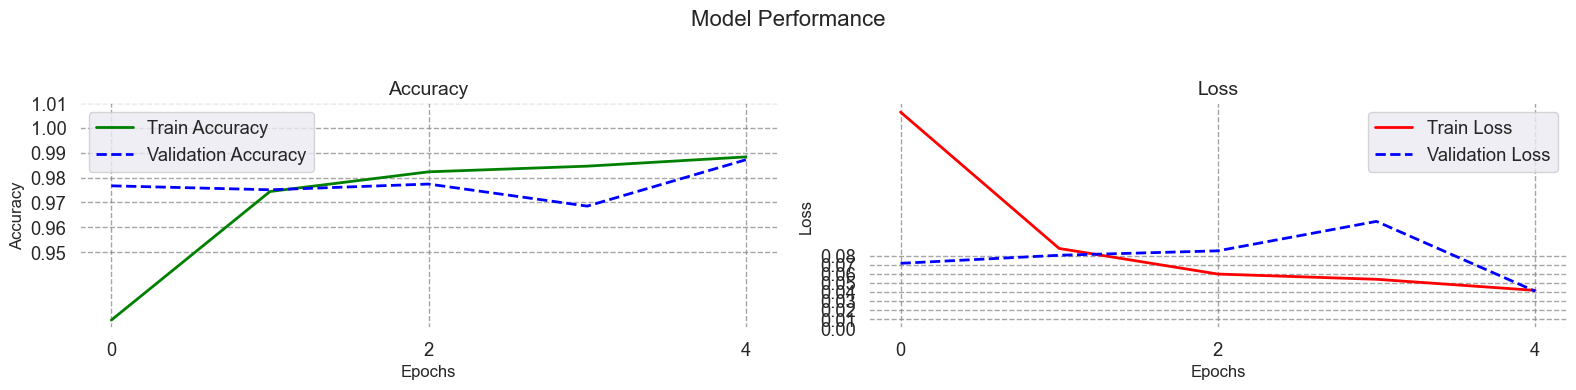

In [93]:
# Define a range of epochs for the x-axis
x = np.arange(len(result_df))

# Initialize figure and axes for side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
fig.suptitle('Model Performance', fontsize=16)

# ax[0] ---> Accuracy
ax[0].plot(x, result_df.Train_Accuracy, label='Train Accuracy', linewidth=2, color='green')
ax[0].plot(x, result_df.Validation_Accuracy, label='Validation Accuracy', linewidth=2, linestyle='--', color='blue')
ax[0].set_title('Accuracy', fontsize=14)
ax[0].set_yticks(np.arange(0.95, 1.01, 0.01))
ax[0].set_xticks(np.arange(0, len(result_df), 2))
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Accuracy', fontsize=12)
ax[0].legend()
ax[0].grid(True, linestyle='--', color='gray', alpha=0.7)
ax[0].set_facecolor('white')

# ax[1] ---> Loss
ax[1].plot(x, result_df.Train_Loss, label='Train Loss', linewidth=2, color='red')
ax[1].plot(x, result_df.Validation_Loss, label='Validation Loss', linewidth=2, linestyle='--', color='blue')
ax[1].set_title('Loss', fontsize=14)
ax[1].set_xticks(np.arange(0, len(result_df), 2))
ax[1].set_yticks(np.arange(0, 0.085, 0.01))
ax[1].set_xlabel('Epochs', fontsize=12)
ax[1].set_ylabel('Loss', fontsize=12)
ax[1].legend()
ax[1].grid(True, linestyle='--', color='gray', alpha=0.7)
ax[1].set_facecolor('white')

# Adjust layout to make room for the super title
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()

In [94]:
# Evaluate the model on the test set without calculating gradients
with torch.no_grad():
    model.eval()
    start_time = datetime.now()
    test_loss = []
    total_correct = 0
    total_samples = 0

    for images, labels in test_loader:
        # Move images and labels to the GPU
        images = images.to(dgpu)
        labels = labels.to(dgpu)

        # Forward pass to get predictions
        predictions = model(images)
        loss = criterion(predictions, labels)

        # Append loss to test_loss list
        test_loss.append(loss.item())

        # Calculate number of correct predictions
        _, predicted_classes = torch.max(predictions, 1)
        total_correct += (predicted_classes == labels).sum().item()
        total_samples += labels.size(0)

    # Compute average test loss and accuracy
    avg_test_loss = np.mean(test_loss)
    test_accuracy = total_correct / total_samples
    elapsed_time = datetime.now() - start_time

    # Print the results with custom formatting
    print(colored(f'Loss: {avg_test_loss:.4f}\nAccuracy: {test_accuracy:.4f}\nDuration: {elapsed_time}', 'cyan'))

Loss: 0.0403
Accuracy: 0.9882
Duration: 0:00:38.427905


In [95]:
model_on_device = model.to(dgpu)

true_labels_list = []
predicted_labels_list = []

for batch_images, batch_labels in test_loader:
    batch_images = batch_images.to(dgpu)
    batch_labels = batch_labels.numpy()
    output_predictions = model_on_device(batch_images)
    _, predicted_batch_labels = torch.max(output_predictions.data, 1)
    predicted_batch_labels = predicted_batch_labels.detach().cpu().numpy()
    true_labels_list = np.append(true_labels_list, batch_labels)
    predicted_labels_list = np.append(predicted_labels_list, predicted_batch_labels)

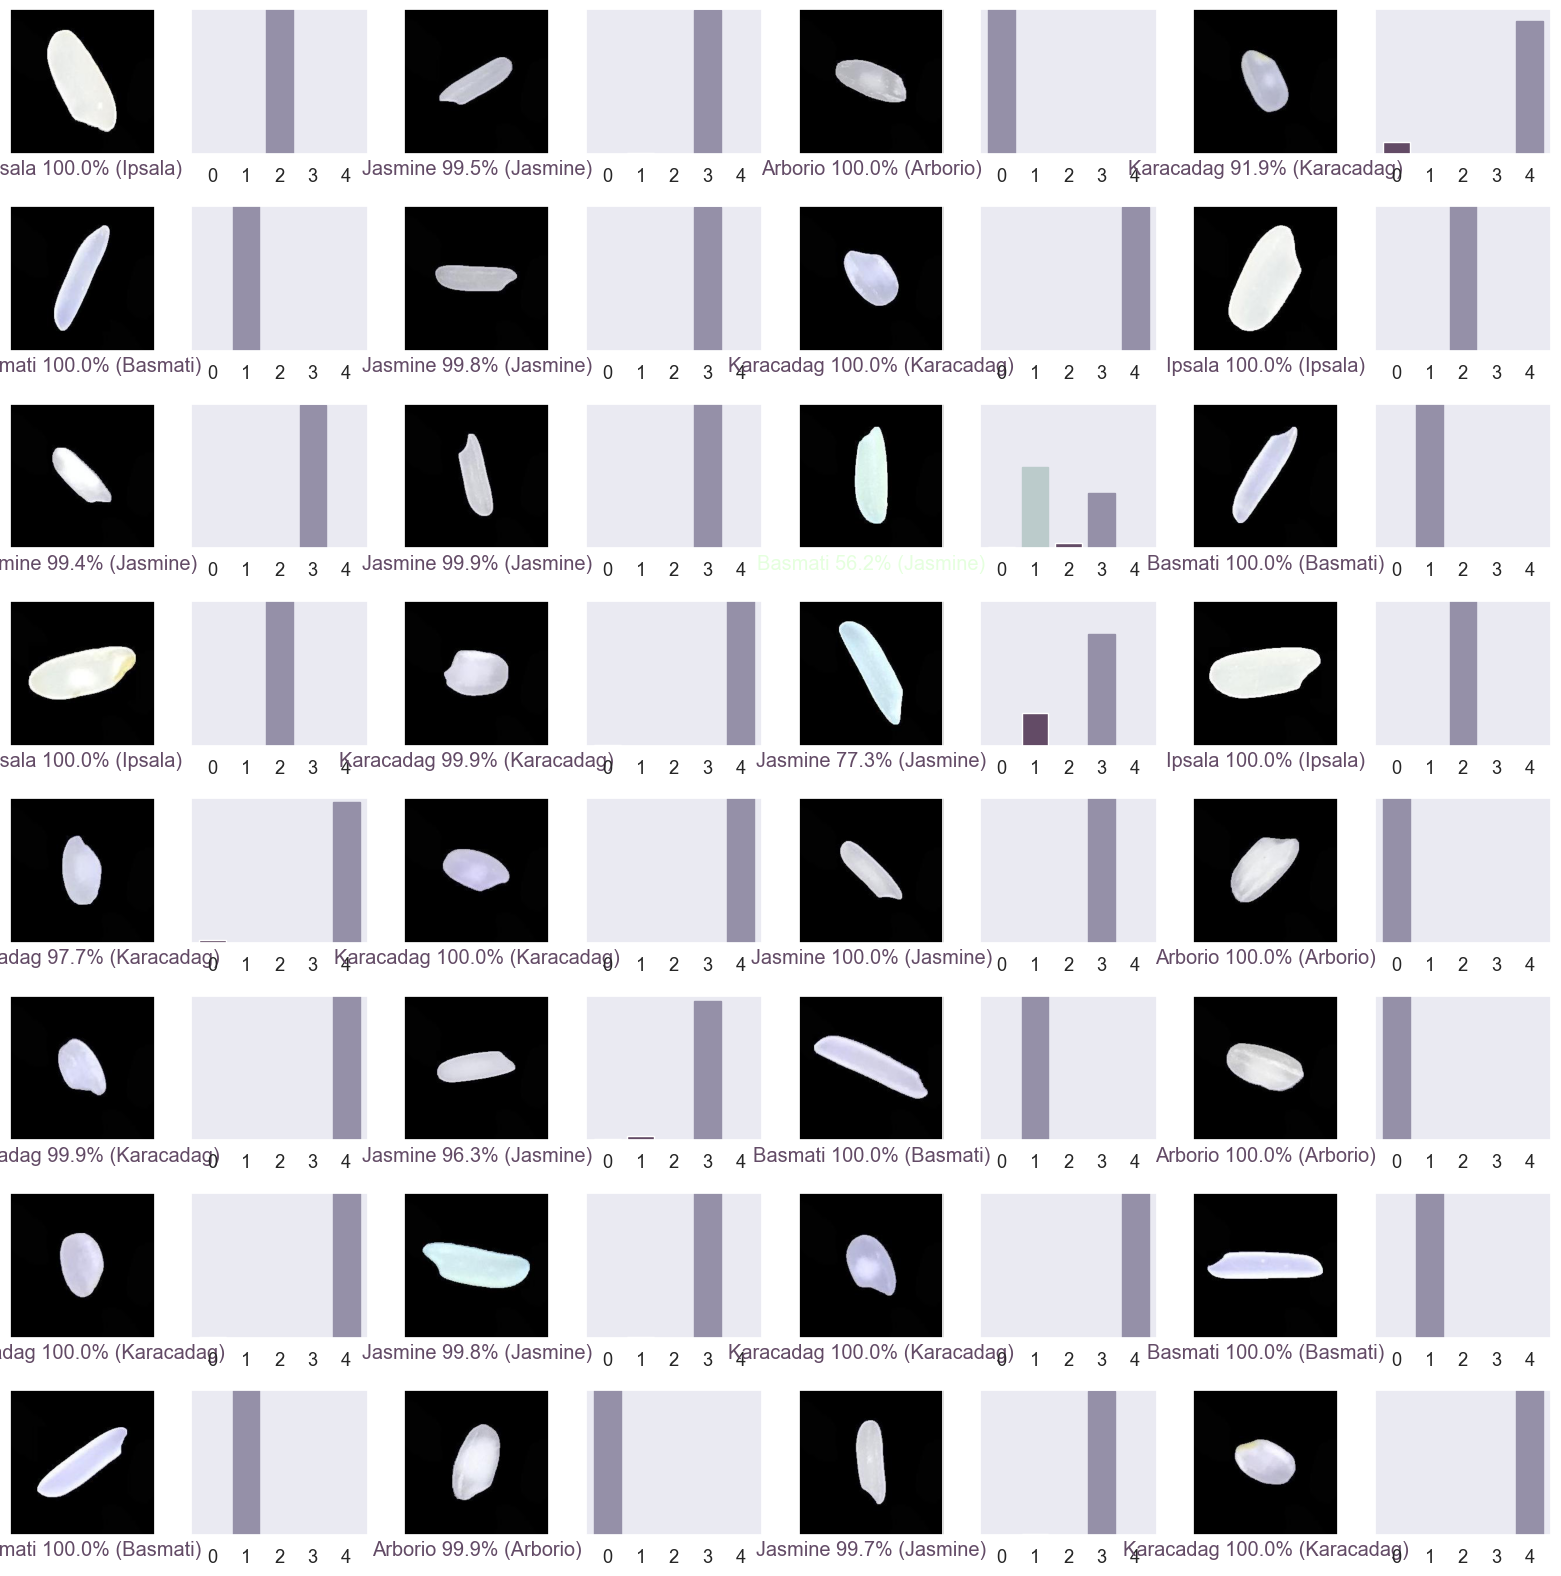

In [96]:
# Move model to CPU
cpu_model = model.cpu()

# Get 1 batch of test_loader
for images_batch, true_labels in test_loader:
    break

def plot_image(output, true_label, img, class_names):
    """
    Plot each image with its prediction and true label.
    Args:
        output (torch.Tensor): Prediction for the input image.
        true_label (torch.Tensor): True label for the input image.
        img (torch.Tensor): Input image.
        class_names (list): List of class names.
    """
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img_np = img.cpu().numpy().transpose((1, 2, 0))
    img_valid_range = np.clip(img_np, 0, 1)
    plt.imshow(img_valid_range)
    
    output = torch.softmax(output, dim=1)  # Apply softmax to get probabilities
    predicted_value, predicted_label = torch.max(output, dim=1)
    predicted_label = predicted_label.cpu().item()
    true_label = true_label.cpu().item()
    
    if predicted_label == true_label:
        color = '#634b66'
    else:
        color = '#e5ffde'
    
    plt.xlabel(f"{class_names[predicted_label]} {100 * predicted_value.item():.1f}% ({class_names[true_label]})", color=color)

def plot_value_array(output, true_label):
    """
    Plot a bar plot of predictions.
    Args:
        output (torch.Tensor): Prediction array for an image.
        true_label (torch.Tensor): True label for the image.
    """
    output = torch.softmax(output, dim=1).squeeze()  # Apply softmax and remove singleton dimensions
    predicted_value, predicted_label = torch.max(output, dim=0)
    predicted_label = predicted_label.cpu().item()
    true_label = true_label.cpu().item()
    
    plt.grid(False)
    plt.xticks(range(len(output)))
    plt.yticks([])
    thisplot = plt.bar(range(len(output)), output.cpu().detach().numpy() * 100, color="#634b66")
    plt.ylim([0, 100])
    
    thisplot[predicted_label].set_color('#bbcbcb')
    thisplot[true_label].set_color('#9590a8')

def plot_model_result(outputs, test_labels, test_images, class_names, num_rows=8, num_cols=4):
    """
    Plot the first X test images, their predicted labels, and true labels.
    Args:
        outputs (list of torch.Tensor): All predictions for test images.
        test_labels (list of torch.Tensor): All true labels for test images.
        test_images (list of torch.Tensor): All test images.
        class_names (list): List of class names.
        num_rows (int): Number of rows in the grid.
        num_cols (int): Number of columns in the grid.
    """
    num_images = num_rows * num_cols
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        plot_image(outputs[i], test_labels[i], test_images[i], class_names)
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plot_value_array(outputs[i], test_labels[i])
    plt.tight_layout()
    plt.show()

# Prepare outputs and labels
outputs = []
for img in images_batch:
    img = img.unsqueeze(0).cpu()  # Move to CPU
    with torch.no_grad():
        output = cpu_model(img)
    outputs.append(output.cpu())

# Plot model results
class_names = list(rice_variety_labels.values())  # rice_variety_labels contains the class names
plot_model_result(outputs, true_labels, images_batch, class_names)

In [97]:
model = model.to(dgpu)
y_true = []
y_pred = []
for images, labels in test_loader:
    images = images.to(dgpu)
    labels = labels.numpy()
    outputs = model(images)
    _, pred = torch.max(outputs.data, 1)
    pred = pred.detach().cpu().numpy()
    y_true = np.append(y_true, labels)
    y_pred = np.append(y_pred, pred)

In [98]:
# Generate a classification report
print(colored("\nClassification Report:", 'cyan'))
class_names = list(rice_variety_labels.values())
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the classification report with some formatting
print("="*60)
print(colored("Detailed Classification Report", 'magenta')) 
print("="*60)
print(report)
print("="*60)


Classification Report:
Detailed Classification Report
              precision    recall  f1-score   support

     Arborio       0.98      0.99      0.99      2250
     Basmati       0.97      1.00      0.98      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       0.99      0.96      0.98      2250
   Karacadag       1.00      0.99      0.99      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



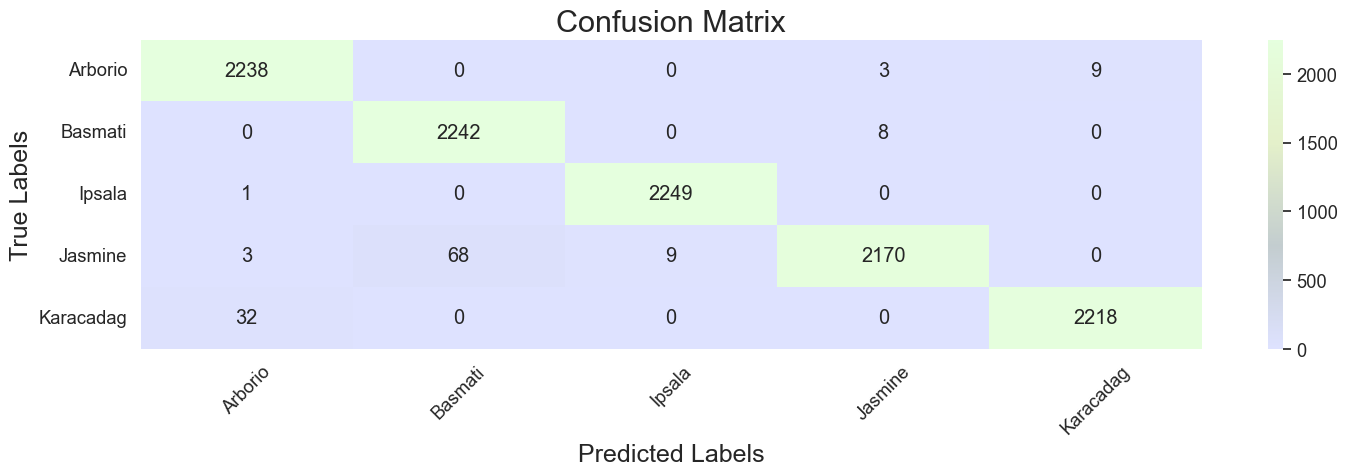

In [99]:
def plot_custom_confusion_matrix(y_true, y_pred):
    """Plot the confusion matrix for the classification results using a custom color palette."""
    
    # Define the custom colormap
    colors = ['#dee2ff', '#c3cdcf', '#e4f0ca','#E5FFDE']
    cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(15, 5))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, cbar=True)
    ax.set_xlabel('Predicted Labels', fontsize=18)
    ax.set_ylabel('True Labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=22)
    ax.xaxis.set_ticklabels(class_names, rotation=45)
    ax.yaxis.set_ticklabels(class_names, rotation=0)
    plt.tight_layout() 
    plt.show()

# Example usage
plot_custom_confusion_matrix(y_true, y_pred)